In [46]:
#FOR SMOTE

!pip install imbalanced-learn --quiet



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
#import libraries
# Data Handling & EDA
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Modeling
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score


# Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# NLP
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.decomposition import LatentDirichletAllocation

# Needed for text cleaning
nltk.download('stopwords')  

# Time Series
import matplotlib.dates as mdates
import string


# System & Warnings
import os
import warnings
warnings.filterwarnings("ignore")




[nltk_data] Downloading package stopwords to C:\Users\kpk
[nltk_data]     laptops\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#Load the datasets
df_diabetes = pd.read_csv("D:/Data Science/MachinLearning Projects/diabetic_data.csv")
df_insurance = pd.read_csv("D:/Data Science/MachinLearning Projects/insurance.csv")
df_heart = pd.read_csv("D:/Data Science/MachinLearning Projects/heart.csv")
print(df_diabetes)

        encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_

In [4]:
print(df_insurance)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [5]:
print(df_heart)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [5]:
#FIRST, MEDICAL COST PREDICTION REGRESSION
#EDA

df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

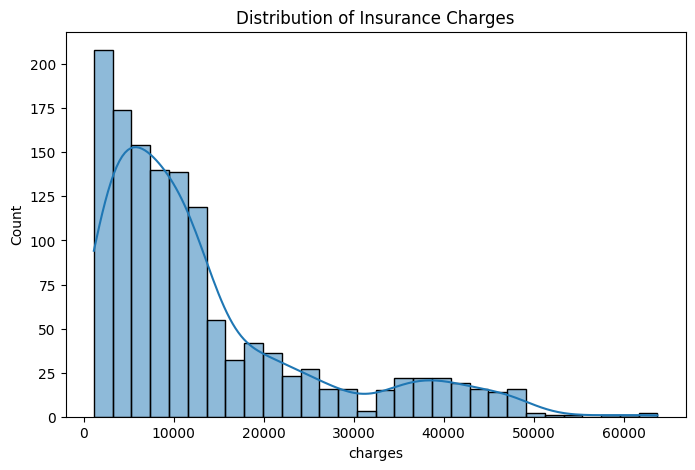

In [9]:
#Visualize the data
# Charges distribution
plt.figure(figsize=(8,5))
sns.histplot(df_insurance['charges'], kde=True)
plt.title("Distribution of Insurance Charges")
plt.show()


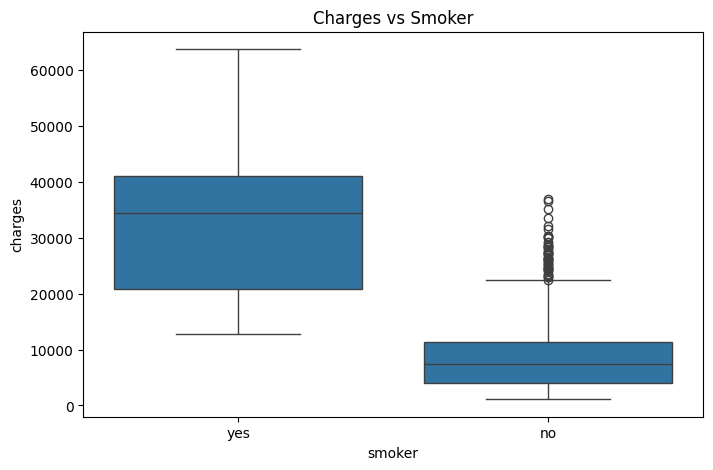

In [10]:
# Charges vs Smoking
plt.figure(figsize=(8,5))
sns.boxplot(x='smoker', y='charges', data= df_insurance)
plt.title("Charges vs Smoker")
plt.show()


In [12]:
df_insurance['sex'] = df_insurance['sex'].map({'female': 0, 'male': 1})
df_insurance['smoker'] = df_insurance['smoker'].map({'no': 0, 'yes': 1})
df_insurance = pd.get_dummies(df_insurance, columns=['region'], drop_first=True)

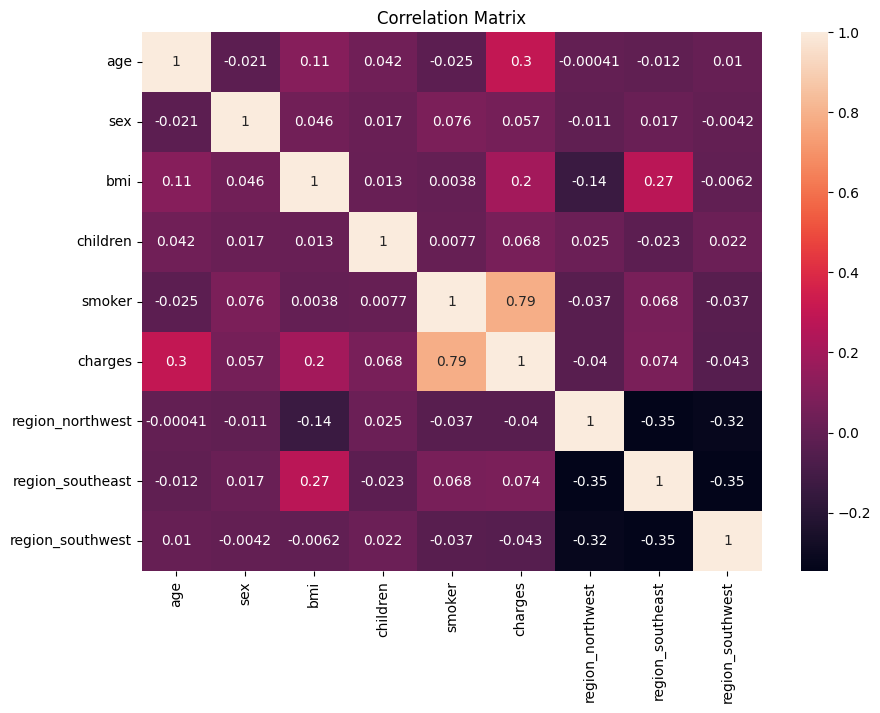

In [14]:
# Correlation heatmap (only numeric)
plt.figure(figsize=(10,7))
sns.heatmap(df_insurance.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()



In [17]:
#Feature Scaling
#Scaling ensures all features contribute equally (especially for linear regression).
#Splitting keeps 80% for training, 20% for testing.
# Split features and target
df_insurance_encoded = pd.get_dummies(df_insurance, drop_first=True)

X = df_insurance_encoded.drop('charges', axis=1)
y = df_insurance_encoded['charges']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [24]:
#Linear Regression Model

#Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

#Predict
y_pred = lr.predict(X_test)

#Evaluate model

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Linear Regression R²: {r2:.2f}")




Linear Regression RMSE: 5796.28
Linear Regression R²: 0.78


            Feature  Coefficient
4            smoker  9544.251089
0               age  3609.149018
2               bmi  2054.885063
3          children   512.478869
7  region_southwest  -347.270359
6  region_southeast  -292.759080
5  region_northwest  -158.959435
1               sex    -9.295337


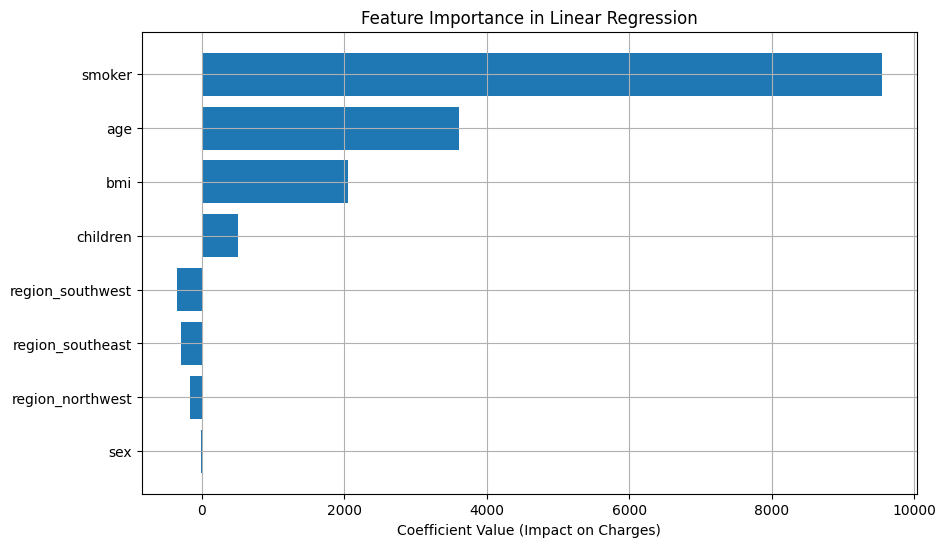

In [25]:

# Get feature names and model coefficients
features = X.columns
coefficients = lr.coef_

# Combine into a DataFrame
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Add absolute value column to sort by impact
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Print the sorted coefficients
print(coef_df[['Feature', 'Coefficient']])

# Plot the coefficients as a bar chart
plt.figure(figsize=(10,6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel("Coefficient Value (Impact on Charges)")
plt.title("Feature Importance in Linear Regression")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


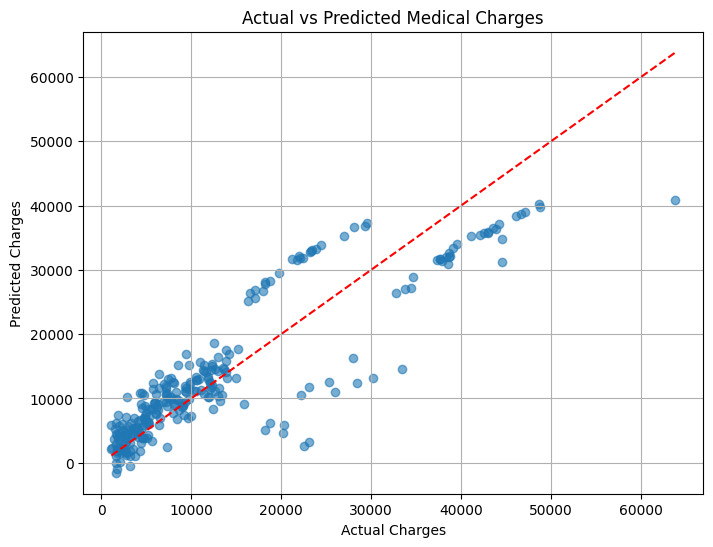

In [26]:

# Predict on test set
y_pred = lr.predict(X_test)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges")
plt.grid(True)
plt.show()


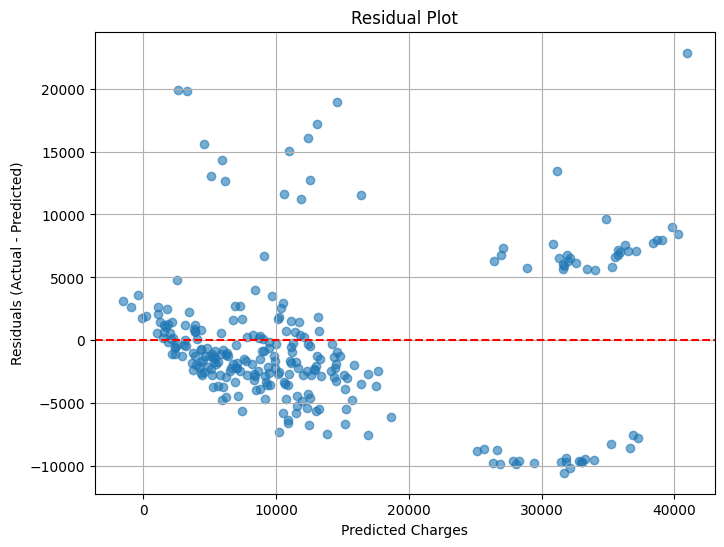

In [27]:
#Residual Plot (Error = Actual - Predicted)
# Residuals
residuals = y_test - y_pred

# Plot
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


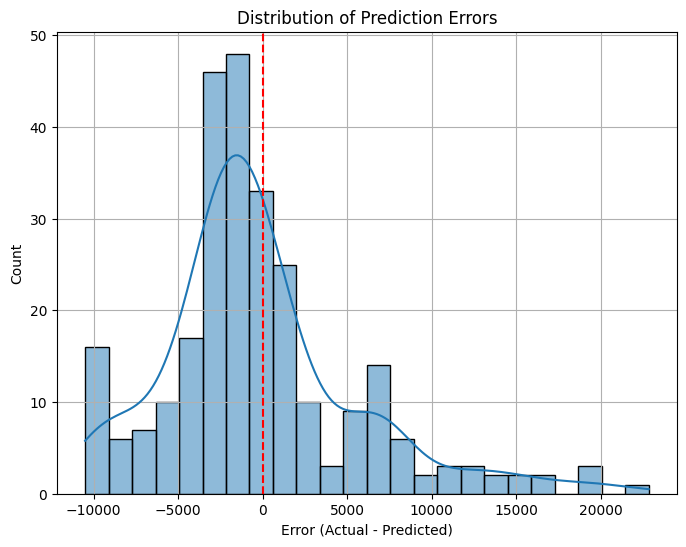

In [28]:
#Distribution of Prediction Errors (Residuals)


plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [76]:
# BUILD RANDOM FOREST REGRESSOR FOR THE SAME INSURANCE COST
#Encode categorical variables

categorical_features = ["sex","smoker","region"]
numerical_features = ["age","bmi","children"]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)

# Prepare features and target

X = df_insurance.drop('charges', axis=1)
y = df_insurance['charges']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fit and transform data

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.fit_transform(X_test)

#Train Random Forest Regressor

rf = RandomForestRegressor(random_state=42, n_estimators=200)
rf.fit(X_train_processed, y_train)

#Make Prediction

rf_pred = rf.predict(X_test_processed)

#Evaluate Model


rfmse = mean_squared_error(y_test, rf_pred)
rmse_rf = np.sqrt(rfmse)
r2_rf = r2_score(y_test, rf_pred)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R²: {r2_rf:.2f}")


Random Forest RMSE: 4594.50
Random Forest R²: 0.86


In [36]:
#Feature importance
feature_names = preprocessor.get_feature_names_out()
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                 Feature  Importance
1        cat__smoker_yes    0.609377
6               num__bmi    0.214847
5               num__age    0.134687
7          num__children    0.019548
0          cat__sex_male    0.006312
2  cat__region_northwest    0.005718
3  cat__region_southeast    0.005407
4  cat__region_southwest    0.004103


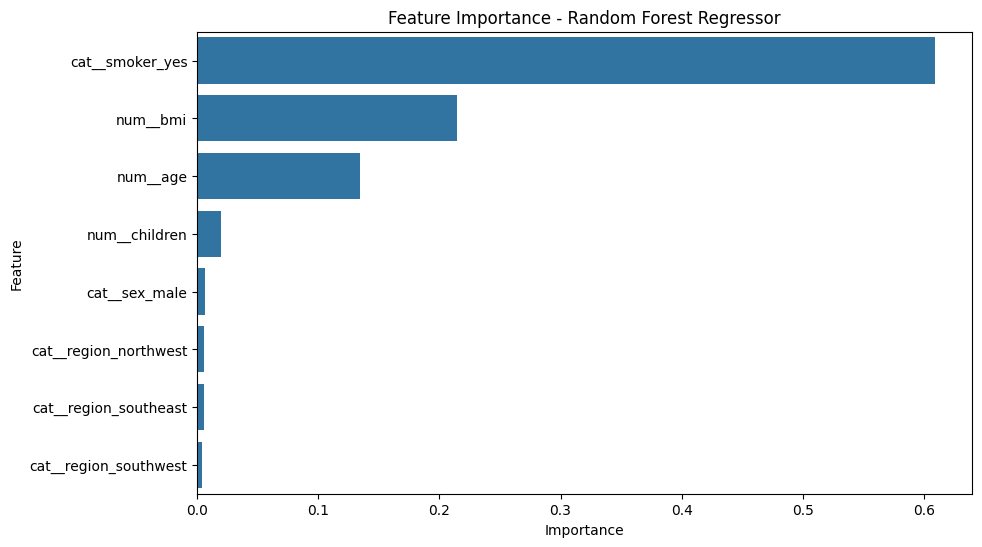

In [37]:
# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance - Random Forest Regressor")
plt.show()


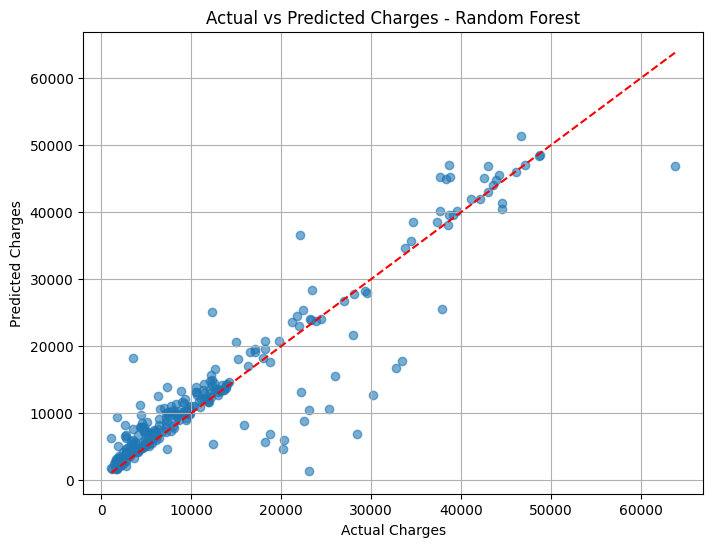

In [38]:
# Plot Actual versus Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, rf_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges - Random Forest")
plt.grid(True)
plt.show()


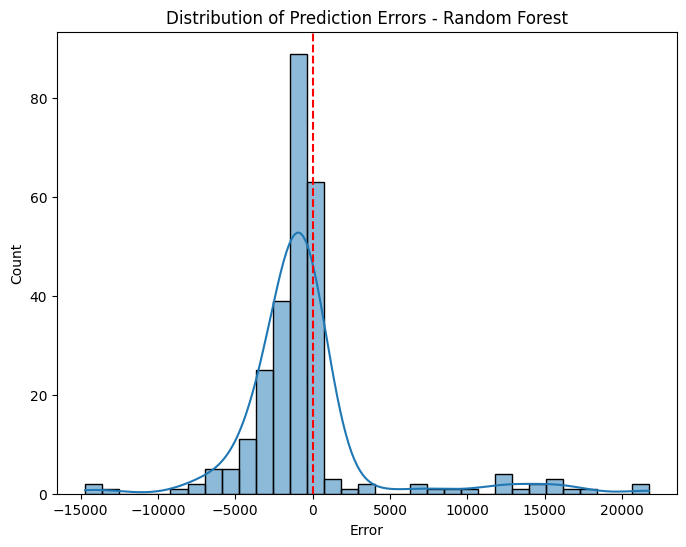

In [39]:
# Residuals
residuals = y_test - rf_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title("Distribution of Prediction Errors - Random Forest")
plt.xlabel("Error")
plt.ylabel("Count")
plt.show()

In [6]:
#HEART DISEASE CLASSIFICATION USING LOGISTIC REGRESSION
print(df_heart.value_counts())

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         8
40   1    0   152       223   0    1        181      0      0.0      2      0   3     0         4
              110       167   0    0        114      1      2.0      1      0   3     0         4
41   1    1   120       157   0    1        182      0      0.0      2      0   2     1         4
71   0    0   112       149   0    1        125      0      1.6      1      0   2     1         4
                                                                                               ..
41   0    1   105       198   0    1        168      0      0.0      2      1   2     1         3
40   1    3   140       199   0    1        178      1      1.4      2      0   3     1         3
34   0    1   118       210   0    1        192      0      0.7      2      0   2     1         3
77   1    0   125       3

In [10]:
print(df_heart.shape)

(1025, 14)


In [11]:
print(df_heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [12]:
print(df_heart.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [7]:
print(df_heart['target'].value_counts())

target
1    526
0    499
Name: count, dtype: int64


In [14]:
print(df_heart.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


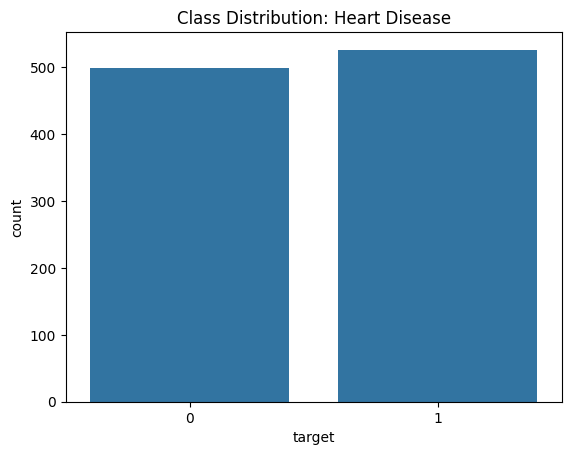

In [16]:
#EXPLORATORY DATA ANALYSIS EDA
sns.countplot(x='target', data = df_heart)
plt.title('Class Distribution: Heart Disease')
plt.show()

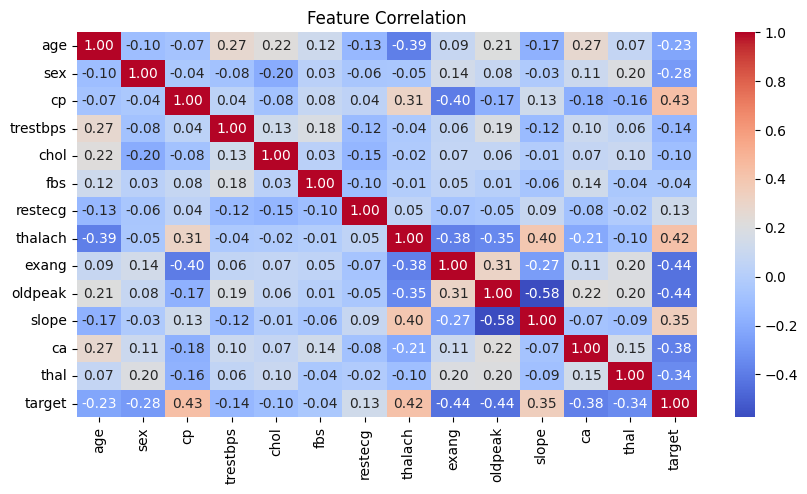

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(df_heart.corr(), annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Feature Correlation')
plt.show()

In [25]:
# Step 4: Preprocessing
X_heart = df_heart.drop('target', axis=1)
y_heart = df_heart['target']

scaler = StandardScaler()
X_heart_scaled = scaler.fit_transform(X_heart)

X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split( X_heart_scaled, y_heart, test_size=0.2, stratify=y_heart, random_state=42)

# Train Logistic Regression
lr_heart = LogisticRegression()
lr_heart.fit(X_train_heart, y_train_heart)

#Predict
y_heart_pred = lr_heart.predict(X_test_heart)

#Evaluate

acc = accuracy_score(y_test_heart, y_heart_pred)

print("Accuracy:", acc)

print(classification_report(y_test_heart, y_heart_pred))

print("Confusion Matrix\n", confusion_matrix(y_test_heart, y_heart_pred))



Accuracy: 0.8097560975609757
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205

Confusion Matrix
 [[70 30]
 [ 9 96]]


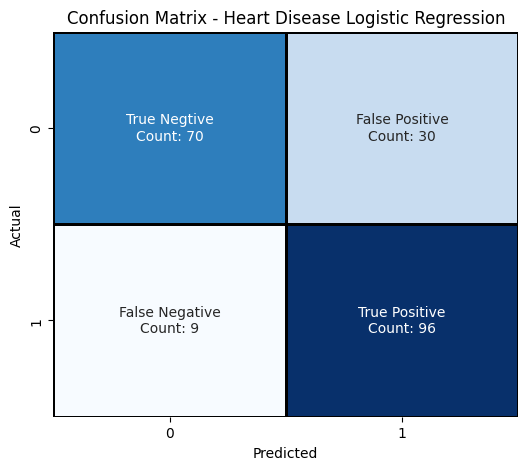

In [29]:
cm = confusion_matrix(y_test_heart, y_heart_pred)
labels = np.array([["True Negtive", "False Positive"],
                   ["False Negative", "True Positive"]])
annot = [[f"{labels[i][j]}\nCount: {cm[i][j]}" for j in range(2)] for i in range(2)]

plt.figure(figsize = (6,5))
sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', cbar=False, linewidths=1, linecolor='black')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Heart Disease Logistic Regression")
plt.show()

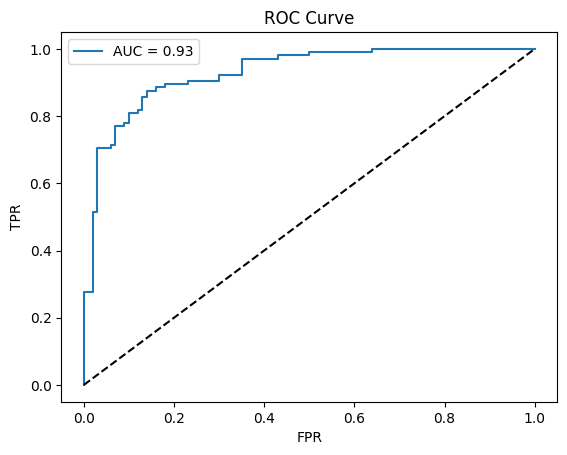

In [32]:
# ROC Curve and AUC
y_proba = lr_heart.predict_proba(X_test_heart)[:,1]
fpr, tpr, _ = roc_curve(y_test_heart, y_proba)
auc = roc_auc_score(y_test_heart, y_proba)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [52]:
print("Total patients:", len(df_diabetes))
print(df_diabetes['readmitted'].value_counts())


Total patients: 241
readmitted
0    213
1     28
Name: count, dtype: int64


In [77]:
#Diabetes Readmission — Classification
#Binary Readmission Prediction

#Exploratory data analysis EDA

df_diabetes.head()


,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary
162,80499960,2,1,7,6,3,7,5,47,1,...,1,0,0,0,0,0,1,0,1,1
460,76959585,0,0,6,6,1,7,10,72,1,...,3,0,0,0,0,0,0,1,1,1
593,114960726,2,0,4,6,1,7,2,61,0,...,2,0,0,0,0,0,1,1,1,1
696,87847776,4,1,6,6,6,7,11,71,1,...,1,0,0,0,0,0,1,1,1,1
771,60354486,2,0,2,6,1,2,14,43,0,...,1,0,0,0,0,0,1,0,1,1


In [78]:
df_diabetes.shape

(241, 47)

In [79]:
df_diabetes.isnull().sum()


patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazo

Unique values in 'readmitted': ['NO' '>30' '<30']
Class distribution before train-test split:
readmitted_binary
1    135
0    106
Name: count, dtype: int64
Resampled class distribution:
 readmitted_binary
1    108
0    108
Name: count, dtype: int64
Accuracy: 0.673469387755102
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        22
           1       0.70      0.70      0.70        27

    accuracy                           0.67        49
   macro avg       0.67      0.67      0.67        49
weighted avg       0.67      0.67      0.67        49

Confusion Matrix:
 [[14  8]
 [ 8 19]]


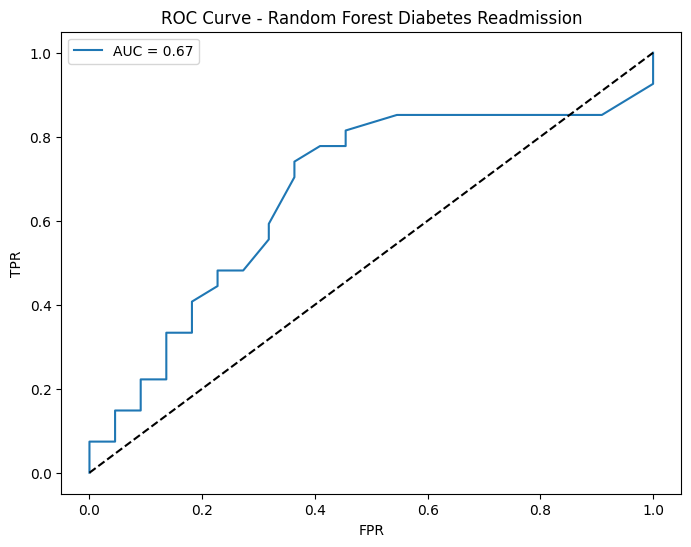

In [111]:
#Random Forest Classifier for Finding Readmission
# Convert all values in 'readmitted' to string and strip spaces
df_diabetes['readmitted'] = df_diabetes['readmitted'].astype(str).str.strip()

# Drop duplicates by patient ID
df_diabetes = df_diabetes.drop_duplicates(subset=['patient_nbr'])

# Check unique values in 'readmitted' to ensure mapping is correct
print("Unique values in 'readmitted':", df_diabetes['readmitted'].unique())

# Map readmitted to 0,1,2 for multi-class classification
mapping = {'<30':0, '>30':1, 'NO':2}
df_diabetes['readmitted'] = df_diabetes['readmitted'].map(mapping)

# Keep only rows with valid mapping
df_diabetes = df_diabetes[df_diabetes['readmitted'].notna()]

# Binary target: 1 = any readmission (<30 or >30), 0 = no readmission
df_diabetes['readmitted_binary'] = df_diabetes['readmitted'].apply(lambda x: 1 if x in [0,1] else 0)

# Replace '?' with NaN in other columns if needed
df_diabetes.replace('?', np.nan, inplace=True)

# Drop unnecessary columns safely
drop_cols = ['weight','payer_code','medical_specialty','encounter_id']
df_diabetes.drop(columns=[col for col in drop_cols if col in df_diabetes.columns], inplace=True)

# Optionally drop rows with remaining NaN values
df_diabetes.dropna(inplace=True)

# ==========================
# 3. Encode categorical features
# ==========================
categorical_cols = df_diabetes.select_dtypes(include=['object']).columns.tolist()

# Remove target columns from categorical list
for target_col in ['readmitted','readmitted_binary']:
    if target_col in categorical_cols:
        categorical_cols.remove(target_col)

df_diabetes_encoded = pd.get_dummies(df_diabetes, columns=categorical_cols, drop_first=True)

# ==========================
# 4. Split features and target
# ==========================
X = df_diabetes_encoded.drop(columns=['readmitted','readmitted_binary'])
y = df_diabetes_encoded['readmitted_binary']

print("Class distribution before train-test split:")
print(y.value_counts())

# ==========================
# 5. Train-test split
# ==========================
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ==========================
# 6. Handle imbalance with SMOTE
# ==========================
sm = SMOTE(random_state=42)
X_train_diabetes, y_train_diabetes = sm.fit_resample(X_train_diabetes, y_train_diabetes)

print("Resampled class distribution:\n", pd.Series(y_train_diabetes).value_counts())

# ==========================
# 7. Train Random Forest Classifier
# ==========================
rf_diabetes = RandomForestClassifier(random_state=42, n_estimators=200, class_weight='balanced')
rf_diabetes.fit(X_train_diabetes, y_train_diabetes)

# ==========================
# 8. Evaluate model
# ==========================
y_pred_diabetes = rf_diabetes.predict(X_test_diabetes)
print("Accuracy:", accuracy_score(y_test_diabetes, y_pred_diabetes))
print(classification_report(y_test_diabetes, y_pred_diabetes))

# Confusion matrix
cm = confusion_matrix(y_test_diabetes, y_pred_diabetes)
print("Confusion Matrix:\n", cm)

# ==========================
# 9. ROC Curve and AUC
# ==========================
y_proba_diabetes = rf_diabetes.predict_proba(X_test_diabetes)[:,1]
fpr, tpr, _ = roc_curve(y_test_diabetes, y_proba_diabetes)
auc_score = roc_auc_score(y_test_diabetes, y_proba_diabetes)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Random Forest Diabetes Readmission")
plt.legend()
plt.show()


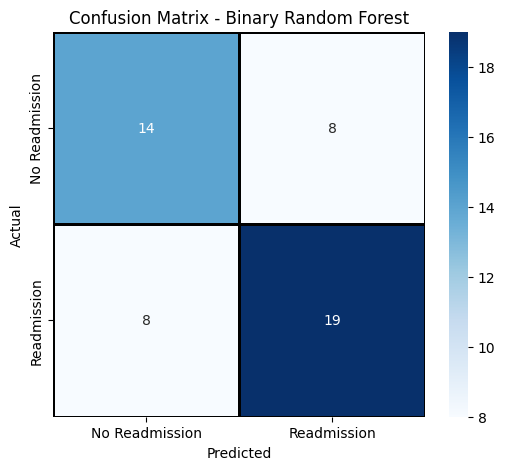

In [114]:
# Compute confusion matrix
cm = confusion_matrix(y_test_diabetes, y_pred_diabetes)

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black', xticklabels=['No Readmission', 'Readmission'], yticklabels=['No Readmission', 'Readmission'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Binary Random Forest')
plt.show()

In [112]:
# -----------------------------
# Multi-class Random Forest
# -----------------------------

# Target column (multi-class)
y_multi = df_diabetes_encoded['readmitted']  # 0 = <30, 1 = >30, 2 = NO
X_multi = df_diabetes_encoded.drop(columns=['readmitted','readmitted_binary'])

# Check class distribution
print("Class distribution:")
print(y_multi.value_counts())

# Train-test split
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.1, stratify=y_multi, random_state=42
)

# Handle imbalance with SMOTE for multi-class
sm_multi = SMOTE(random_state=42)
X_train_multi, y_train_multi = sm_multi.fit_resample(X_train_multi, y_train_multi)

print("Resampled class distribution:")
print(pd.Series(y_train_multi).value_counts())

# Train multi-class Random Forest
rf_multi = RandomForestClassifier(
    random_state=42,
    n_estimators=200,
    class_weight='balanced'
)
rf_multi.fit(X_train_multi, y_train_multi)

# Evaluate
y_pred_multi = rf_multi.predict(X_test_multi)
print("Accuracy:", accuracy_score(y_test_multi, y_pred_multi))
print(classification_report(y_test_multi, y_pred_multi))

# Confusion matrix
cm_multi = confusion_matrix(y_test_multi, y_pred_multi)
print("Confusion Matrix:\n", cm_multi)


Class distribution:
readmitted
1    107
2    106
0     28
Name: count, dtype: int64
Resampled class distribution:
readmitted
1    96
0    96
2    96
Name: count, dtype: int64
Accuracy: 0.48
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.57      0.36      0.44        11
           2       0.57      0.73      0.64        11

    accuracy                           0.48        25
   macro avg       0.38      0.36      0.36        25
weighted avg       0.50      0.48      0.48        25

Confusion Matrix:
 [[0 1 2]
 [3 4 4]
 [1 2 8]]


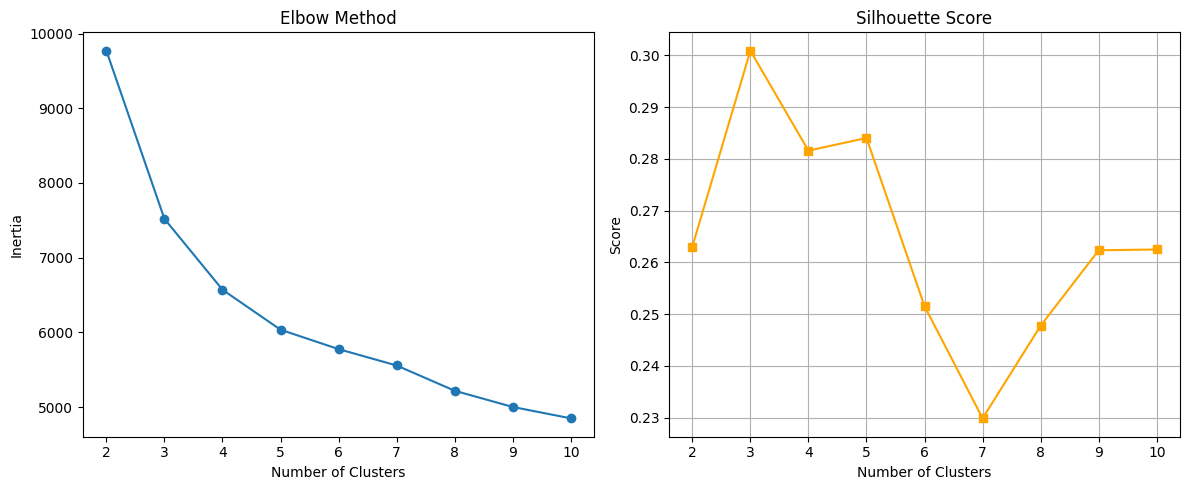

In [41]:
#CLUSTERING ALOGORITHM FOR INSURANCE DATA SET
charges_col = df_insurance['charges']

# Convert smoker to 0/1 if not numeric
#if df_insurance['smoker'].dtype == 'object':
    #df_insurance['smoker'] = df_insurance['smoker'].str.lower().map({'yes': 1, 'no': 0})

# Similarly for sex if needed
#if df_insurance['sex'].dtype == 'object':
   # df_insurance['sex'] = df_insurance['sex'].str.lower().map({'male': 1, 'female': 0})
# One-hot encode categorical features (drop_first to avoid multicollinearity)
df_encoded = pd.get_dummies(df_insurance, drop_first=True)

# Drop target for clustering
X = df_encoded.drop('charges', axis=1)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to choose number of clusters
inertia = []
sil_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow and Silhouette Score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(K_range, sil_scores, marker='s', color='orange')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")

plt.tight_layout()
plt.grid(True)
plt.show()


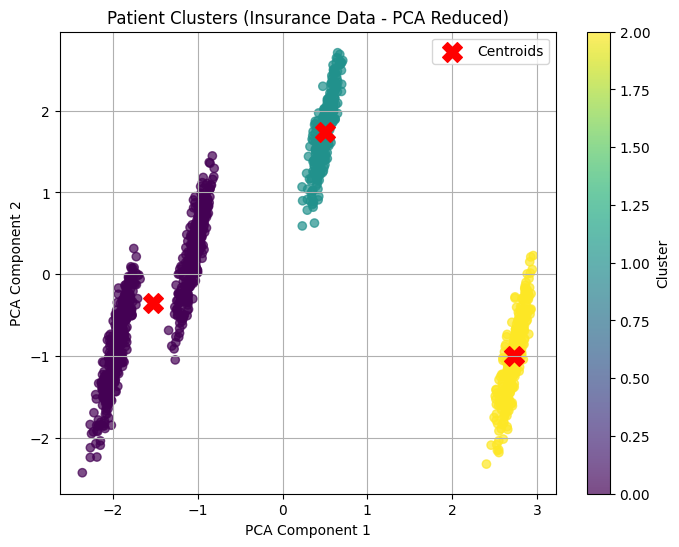

In [42]:
# FINAL CLUSTERING with chosen k
k = 3  # Adjust this based on elbow/silhouette
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df_encoded['cluster'] = clusters
df_encoded['charges'] = charges_col  # restore target column for analysis

# Reduce dimensions for 2D plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title("Patient Clusters (Insurance Data - PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)

# Optionally plot centroids (on PCA space)
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.legend()

plt.show()



In [43]:
# Summary Statistics for Each Cluster
summary = df_encoded.groupby('cluster').mean(numeric_only=True)
print("\nCluster-wise Summary Statistics (Averages):\n")
print(summary)



Cluster-wise Summary Statistics (Averages):

               age        bmi  children       charges  sex_male  smoker_yes  \
cluster                                                                       
0        39.094477  31.386330  1.047965  14109.532481  0.511628    0.229651   
1        39.196923  29.199785  1.147692  12417.575374  0.495385    0.178462   
2        39.455385  30.596615  1.141538  12346.937377  0.501538    0.178462   

         region_northwest  region_southeast  region_southwest  clusters  
cluster                                                                  
0                     0.0           0.52907               0.0       0.0  
1                     1.0           0.00000               0.0       1.0  
2                     0.0           0.00000               1.0       2.0  


In [44]:
#Count of records in each cluster
print("\nCluster Counts:\n")
print(df_encoded['cluster'].value_counts())



Cluster Counts:

cluster
0    688
2    325
1    325
Name: count, dtype: int64



Cluster Profiles with Descriptive Labels:

               age        bmi  children       charges  smoker_yes  sex_male  \
cluster                                                                       
0        39.094477  31.386330  1.047965  14109.532481    0.229651  0.511628   
1        39.196923  29.199785  1.147692  12417.575374    0.178462  0.495385   
2        39.455385  30.596615  1.141538  12346.937377    0.178462  0.501538   

                 Cluster_Label  
cluster                         
0        High Spend & High BMI  
1          Low Spend & Healthy  
2          Low Spend & Healthy  


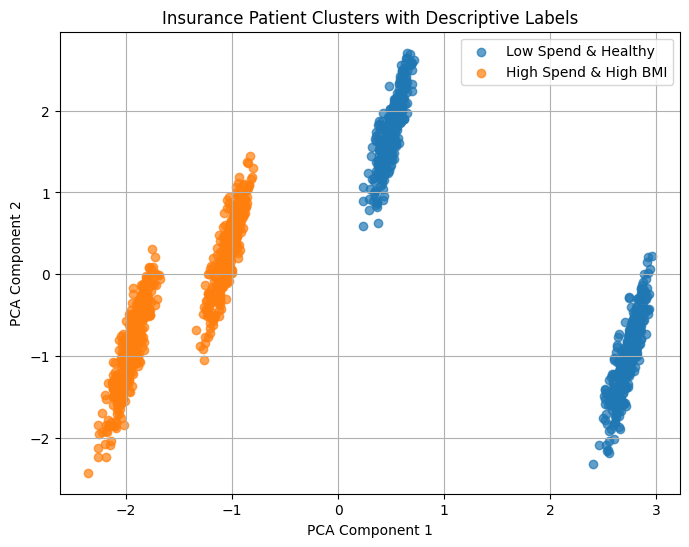

In [45]:
#Automatic Cluster Labeling
cluster_profile = df_encoded.groupby('cluster').agg({
    'age': 'mean',
    'bmi': 'mean',
    'children': 'mean',
    'charges': 'mean',
    'smoker_yes': 'mean',
    'sex_male': 'mean'
})

# Function to name clusters based on characteristics
def name_cluster(row):
    if row['charges'] > df_encoded['charges'].mean() and row['smoker_yes'] > 0.5:
        return 'High Spenders - Mostly Smokers'
    elif row['charges'] > df_encoded['charges'].mean() and row['bmi'] > df_encoded['bmi'].mean():
        return 'High Spend & High BMI'
    elif row['charges'] < df_encoded['charges'].mean() and row['bmi'] < df_encoded['bmi'].mean():
        return 'Low Spend & Healthy'
    else:
        return 'Moderate Spend / Mixed Profile'

cluster_profile['Cluster_Label'] = cluster_profile.apply(name_cluster, axis=1)

# Map cluster numbers to descriptive labels
df_encoded['Cluster_Label'] = df_encoded['cluster'].map(cluster_profile['Cluster_Label'])

print("\nCluster Profiles with Descriptive Labels:\n")
print(cluster_profile)

#  PCA Plot with Descriptive Labels

plt.figure(figsize=(8,6))
for label in df_encoded['Cluster_Label'].unique():
    subset = df_encoded[df_encoded['Cluster_Label'] == label]
    plt.scatter(
        X_pca[subset.index, 0], 
        X_pca[subset.index, 1], 
        label=label, 
        alpha=0.7
    )
plt.title("Insurance Patient Clusters with Descriptive Labels")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


In [29]:
# Example of describing one cluster
cluster_0_summary = df_insurance[df_insurance['clusters'] == 0].describe()
print("Cluster 0 Summary:\n", cluster_0_summary)

Cluster 0 Summary:
               age         bmi    children       charges  clusters  cluster
count  688.000000  688.000000  688.000000    688.000000     688.0    688.0
mean    39.094477   31.386330    1.047965  14109.532481       0.0      0.0
std     14.110340    6.565887    1.186666  12772.742098       0.0      0.0
min     18.000000   15.960000    0.000000   1121.873900       0.0      0.0
25%     27.000000   26.407500    0.000000   4740.170687       0.0      0.0
50%     39.000000   31.145000    1.000000   9735.840050       0.0      0.0
75%     51.000000   35.970000    2.000000  18965.502690       0.0      0.0
max     64.000000   53.130000    5.000000  63770.428010       0.0      0.0


In [50]:
#Time Series Analysis on Diabetic Patients

#Preprocessing

# Strip and map readmission
df_diabetes['readmitted'] = df_diabetes['readmitted'].astype(str).str.strip()
df_diabetes['readmitted_flag'] = df_diabetes['readmitted'].map({'<30': 1, '>30': 1, 'NO': 0})

# Sort by patient and encounter
df_diabetes.sort_values(by=['patient_nbr', 'encounter_id'], inplace=True)

#Identify Patients With Multiple Encounters

# Count visits per patient
visit_counts = df_diabetes['patient_nbr'].value_counts()
multi_visit_patients = visit_counts[visit_counts > 1].index

# Let's analyze the top 5 patients with most visits
top_patients = visit_counts.head(5).index


   

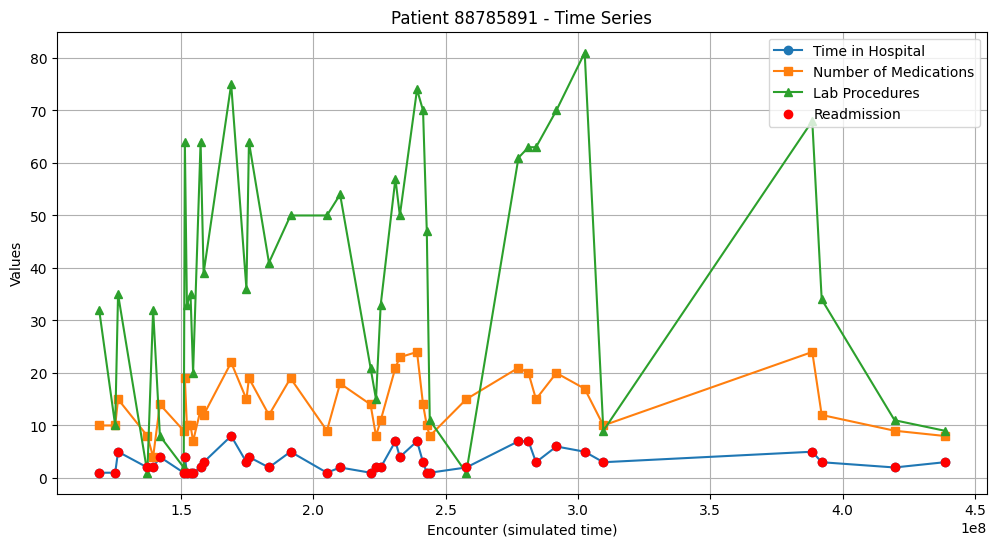

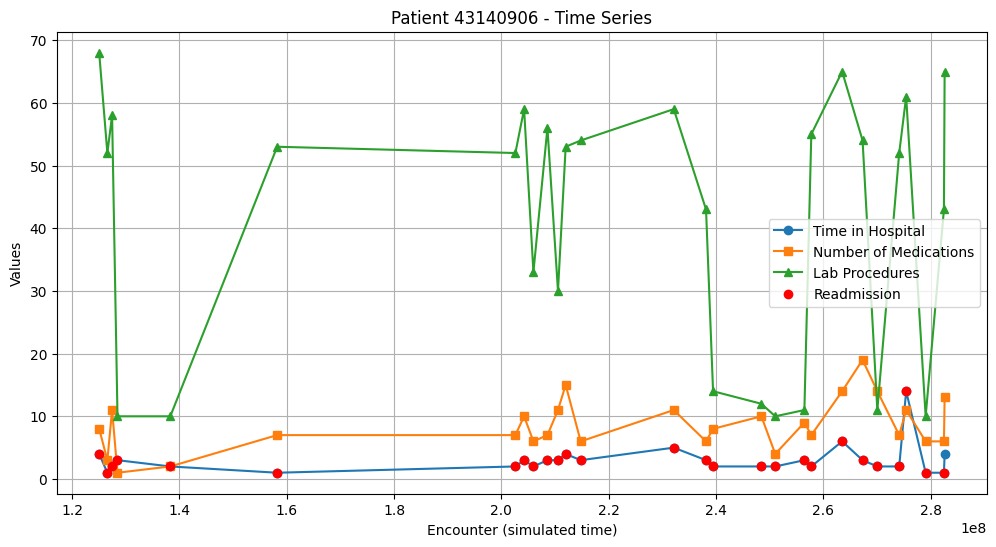

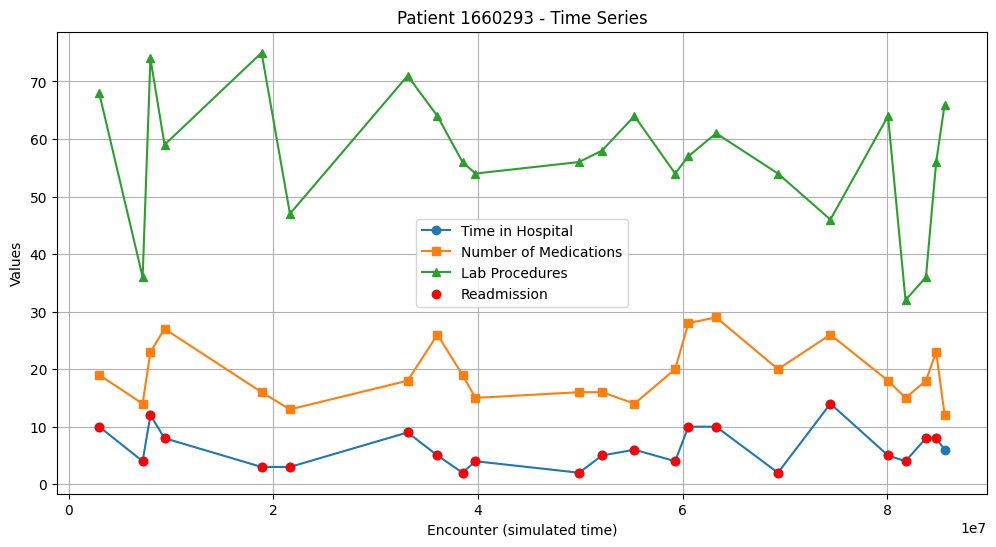

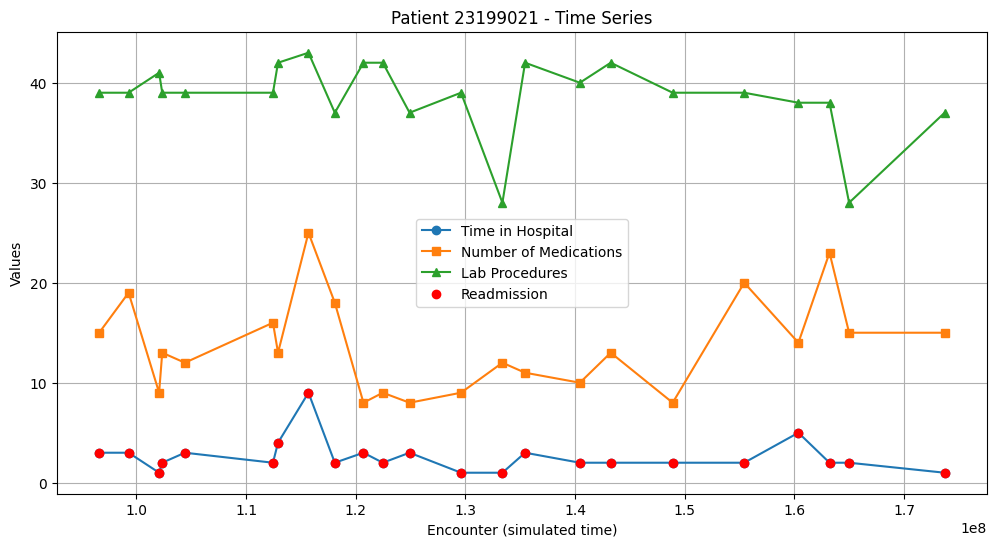

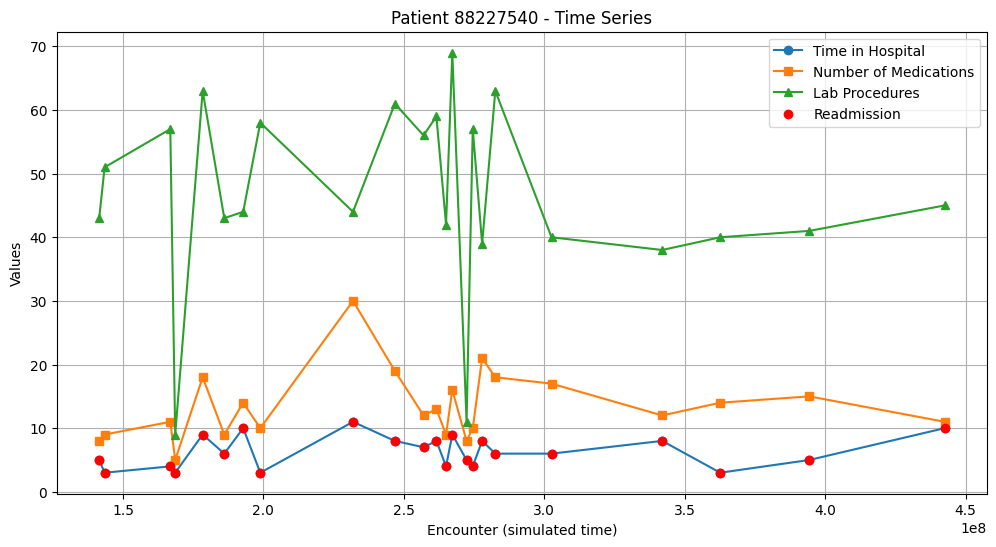

In [53]:
for patient in top_patients:
    df_patient = df_diabetes[df_diabetes['patient_nbr'] == patient]

    plt.figure(figsize=(12,6))
    
    plt.plot(df_patient['encounter_id'], df_patient['time_in_hospital'], label='Time in Hospital', marker='o')
    plt.plot(df_patient['encounter_id'], df_patient['num_medications'], label='Number of Medications', marker='s')
    plt.plot(df_patient['encounter_id'], df_patient['num_lab_procedures'], label='Lab Procedures', marker='^')

    # Show red dots where readmission happened
    readmit = df_patient[df_patient['readmitted_flag'] == 1]
    plt.scatter(readmit['encounter_id'], readmit['time_in_hospital'], color='red', label='Readmission', zorder=5)

    plt.title(f"Patient {patient} - Time Series")
    plt.xlabel("Encounter (simulated time)")
    plt.ylabel("Values")
    plt.legend()
    plt.grid(True)
    plt.show()

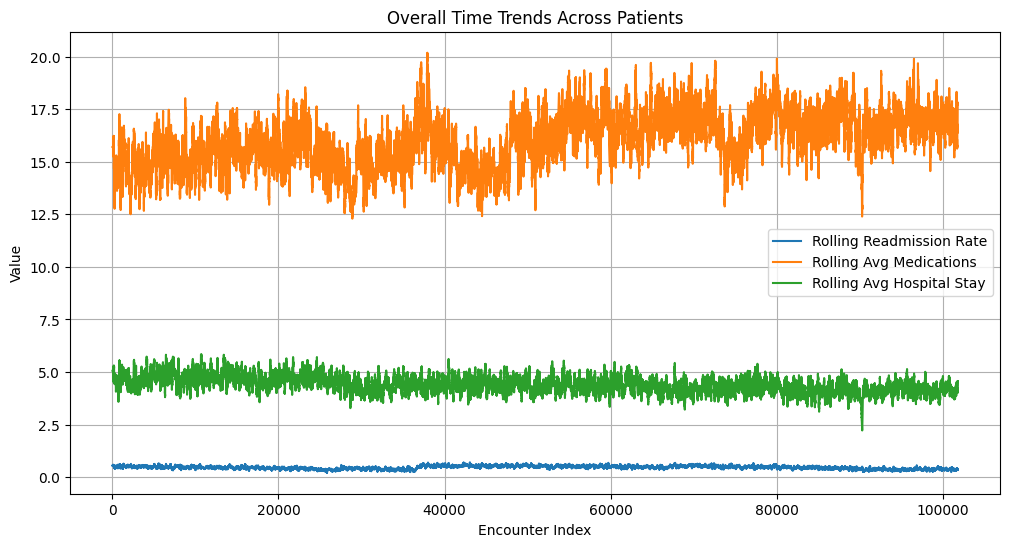

In [54]:
#Aggregate Temporal Trends Across All Patients
# Sort globally
df_global = df_diabetes.sort_values(by='encounter_id')

# Compute rolling average
df_global['rolling_readmit'] = df_global['readmitted_flag'].rolling(window=100).mean()
df_global['rolling_medications'] = df_global['num_medications'].rolling(window=100).mean()
df_global['rolling_hosp_days'] = df_global['time_in_hospital'].rolling(window=100).mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(df_global['rolling_readmit'], label='Rolling Readmission Rate')
plt.plot(df_global['rolling_medications'], label='Rolling Avg Medications')
plt.plot(df_global['rolling_hosp_days'], label='Rolling Avg Hospital Stay')
plt.title("Overall Time Trends Across Patients")
plt.xlabel("Encounter Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


In [64]:

df = df_diabetes.copy()

# Create binary flag for readmission
df['readmitted_flag'] = df['readmitted'].apply(lambda x: 1 if x in [0, 1] else 0)

# Count visits per patient
df['visit_count'] = df.groupby('patient_nbr')['encounter_id'].transform('count')

# Use qcut with duplicates='drop' to avoid errors
bins = pd.qcut(df['visit_count'], q=4, duplicates='drop')

# Generate dynamic labels based on number of unique bins
num_bins = bins.cat.categories.size
labels = ['Low', 'Medium', 'High', 'Very High'][:num_bins]  # Trim if fewer bins

# Apply qcut again with proper labels
df['cohort'] = pd.qcut(df['visit_count'], q=4, labels=labels, duplicates='drop')

# Group and calculate mean trends
cohort_trends = df.groupby('cohort')[['num_medications', 'time_in_hospital', 'readmitted_flag']].mean()

print(cohort_trends)



        num_medications  time_in_hospital  readmitted_flag
cohort                                                    
Low           15.829760          4.340386              0.0
Medium        17.038716          4.690333              0.0


In [65]:
print(df['cohort'].value_counts())


cohort
Low       85597
Medium    16169
Name: count, dtype: int64


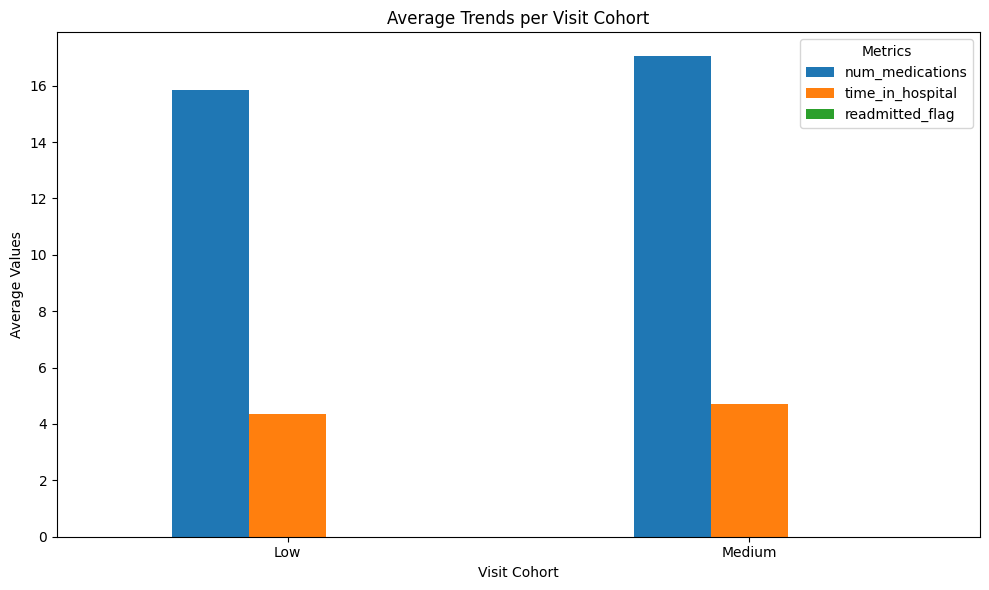

In [67]:
# Plotting cohort trends as a bar chart
cohort_trends.plot(
    kind='bar',
    figsize=(10, 6),
    title='Average Trends per Visit Cohort',
    rot=0  # Keep cohort labels horizontal
)

# Optional: add labels for better readability
plt.xlabel('Visit Cohort')
plt.ylabel('Average Values')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()


In [68]:
# Manually define bins based on visit_count values
df['visit_count'] = df.groupby('patient_nbr')['encounter_id'].transform('count')

# Define bins: 1 visit, 2-3 visits, 4-6 visits, 7+ visits
df['cohort'] = pd.cut(df['visit_count'], 
                      bins=[0, 1, 3, 6, df['visit_count'].max()],
                      labels=['Low', 'Medium', 'High', 'Very High'],
                      include_lowest=True)

# Recalculate cohort trends
cohort_trends = df.groupby('cohort')[['num_medications', 'time_in_hospital', 'readmitted_flag']].mean()

print(cohort_trends)


           num_medications  time_in_hospital  readmitted_flag
cohort                                                       
Low              15.629263          4.218888              0.0
Medium           16.185531          4.555977              0.0
High             16.944557          4.703570              0.0
Very High        17.260158          4.659204              0.0


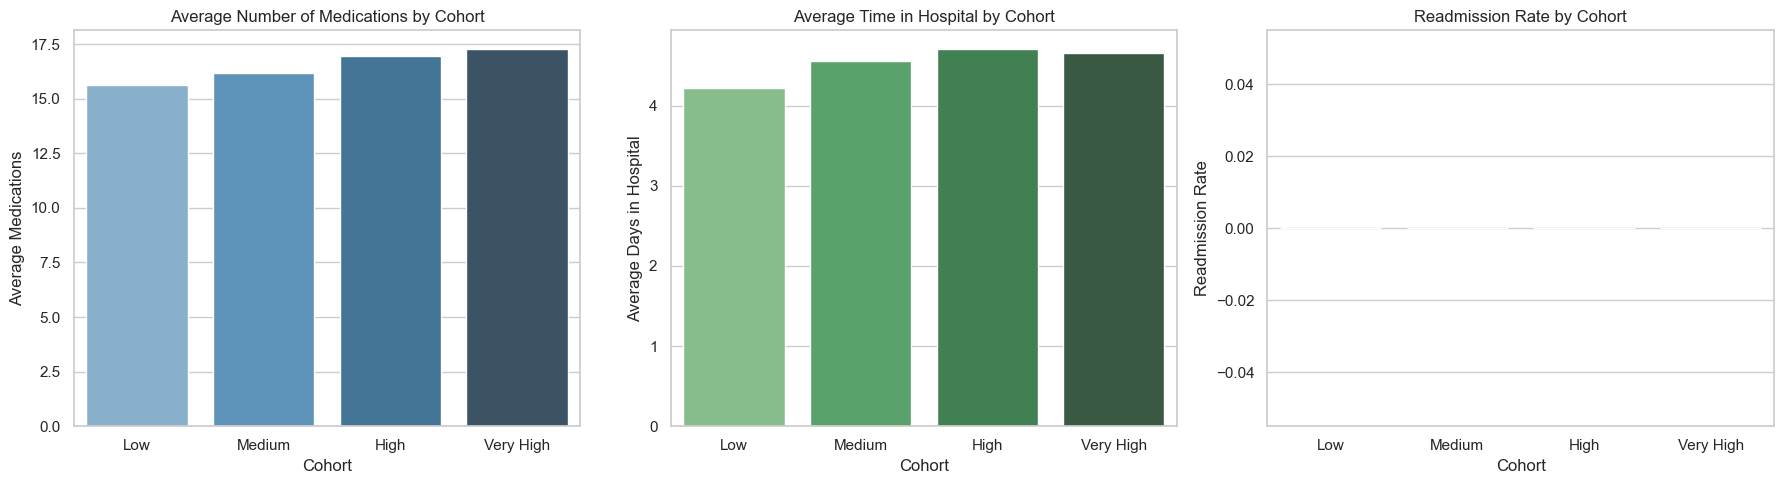

In [69]:


# Ensure 'cohort_trends' is calculated
cohort_trends = df.groupby('cohort')[['num_medications', 'time_in_hospital', 'readmitted_flag']].mean()

# Reset index for easier plotting
cohort_trends_reset = cohort_trends.reset_index()

# Set the plotting style
sns.set(style="whitegrid")

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Plot num_medications
sns.barplot(x='cohort', y='num_medications', data=cohort_trends_reset, ax=axes[0], palette="Blues_d")
axes[0].set_title('Average Number of Medications by Cohort')
axes[0].set_ylabel('Average Medications')
axes[0].set_xlabel('Cohort')

# Plot time_in_hospital
sns.barplot(x='cohort', y='time_in_hospital', data=cohort_trends_reset, ax=axes[1], palette="Greens_d")
axes[1].set_title('Average Time in Hospital by Cohort')
axes[1].set_ylabel('Average Days in Hospital')
axes[1].set_xlabel('Cohort')

# Plot readmitted_flag
sns.barplot(x='cohort', y='readmitted_flag', data=cohort_trends_reset, ax=axes[2], palette="Reds_d")
axes[2].set_title('Readmission Rate by Cohort')
axes[2].set_ylabel('Readmission Rate')
axes[2].set_xlabel('Cohort')

plt.tight_layout()
plt.show()


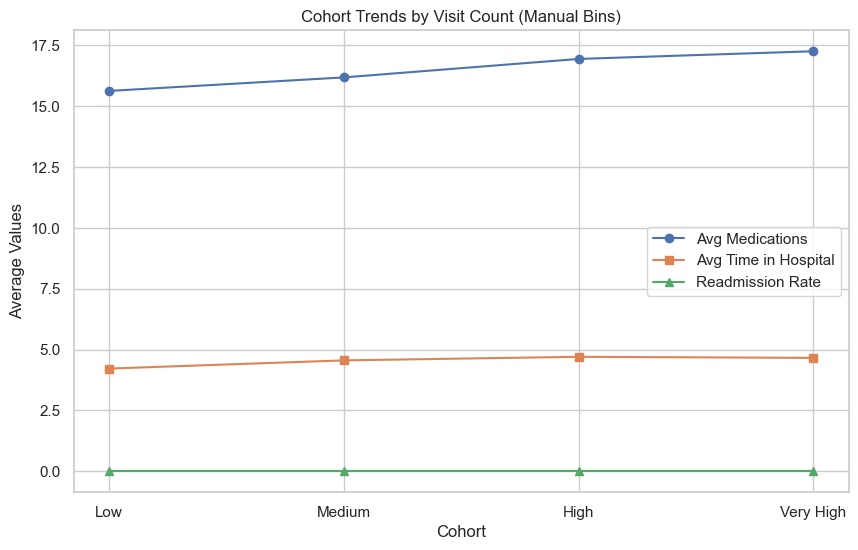

In [70]:

# Ensure cohort_trends is calculated
cohort_trends = df.groupby('cohort')[['num_medications', 'time_in_hospital', 'readmitted_flag']].mean()

# Reset index for plotting
cohort_trends_reset = cohort_trends.reset_index()

# Set figure size
plt.figure(figsize=(10,6))

# Plot all three metrics as lines
plt.plot(cohort_trends_reset['cohort'], cohort_trends_reset['num_medications'], marker='o', label='Avg Medications')
plt.plot(cohort_trends_reset['cohort'], cohort_trends_reset['time_in_hospital'], marker='s', label='Avg Time in Hospital')
plt.plot(cohort_trends_reset['cohort'], cohort_trends_reset['readmitted_flag'], marker='^', label='Readmission Rate')

# Add title and labels
plt.title('Cohort Trends by Visit Count (Manual Bins)')
plt.xlabel('Cohort')
plt.ylabel('Average Values')
plt.legend()
plt.grid(True)
plt.show()


[nltk_data] Downloading package stopwords to C:\Users\kpk
[nltk_data]     laptops\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



🧠 Topic 1: 403 | 425 | 250 | 411 | 585 | 410 | cardiology | 427 | 428 | 414

🧠 Topic 2: 574 | 577 | internalmedicine | v45 | 707 | 2508 | 276 | 38 | 599 | 682

🧠 Topic 3: 560 | 427 | 250 | 25001 | internalmedicine | 276 | 518 | 428 | 491 | 486

🧠 Topic 4: orthopedics | 278 | 780 | 530 | 996 | 715 | 272 | 786 | 401 | 250

🧠 Topic 5: 785 | 428 | 820 | 578 | 280 | 403 | internalmedicine | 276 | 285 | 584


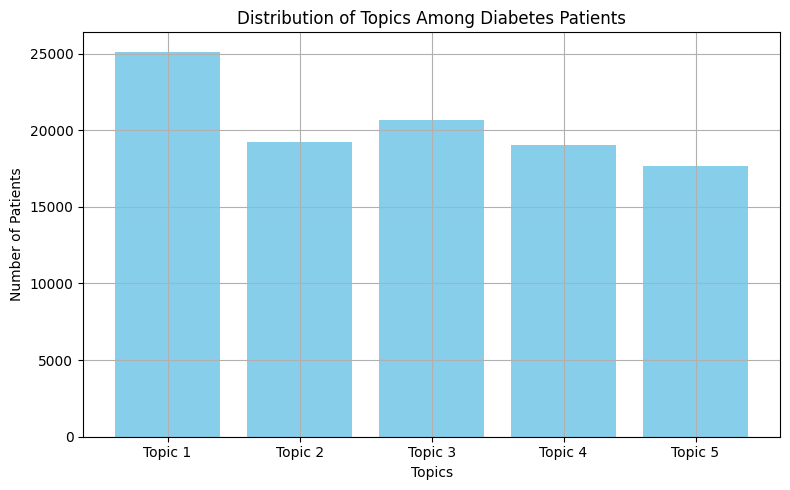

In [17]:

#Natural Language Processing
# Step 2: Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Step 3: Select relevant text columns
text_cols = ['medical_specialty', 'diag_1', 'diag_2', 'diag_3']
df_text = df_diabetes[text_cols].astype(str).fillna('')

# Step 4: Combine text into single column
df_text['notes'] = df_text[text_cols].agg(' '.join, axis=1)

# Step 5: Clean text
def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df_text['clean_notes'] = df_text['notes'].apply(clean_text)

# Step 6: TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df_text['clean_notes'])

# Step 7: LDA topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_tfidf)

# Step 8: Display top words in each topic
feature_names = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[-10:]]
    print(f"\n🧠 Topic {idx+1}: {' | '.join(top_words)}")

# Step 9: Assign dominant topic to each record
topic_distribution = lda.transform(X_tfidf)
df_text['dominant_topic'] = topic_distribution.argmax(axis=1)

# Step 10: Visualize topic distribution
topic_counts = df_text['dominant_topic'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
plt.bar(range(len(topic_counts)), topic_counts.values, color='skyblue')
plt.xticks(range(len(topic_counts)), [f"Topic {i+1}" for i in range(len(topic_counts))])
plt.xlabel("Topics")
plt.ylabel("Number of Patients")
plt.title("Distribution of Topics Among Diabetes Patients")
plt.grid(True)
plt.tight_layout()
plt.show()
